# Modelando la Pandemia


# 01 - Exploración de Datos y Medición de K

In [1]:
import numpy as np
import pandas as pd
import pylab as plt
from scipy.optimize import curve_fit
from statistics import mean

In [2]:
#cargamos los datos
data = pd.read_csv(r"C:\Users\ggira\OneDrive\02 - Cursos\01 - Data Science - Acamica\00 - Sprint projects\04 - Informe pandemico\owid-covid-data.csv")
data.head()


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138046 entries, 0 to 138045
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    138046 non-null  object 
 1   continent                                   129260 non-null  object 
 2   location                                    138046 non-null  object 
 3   date                                        138046 non-null  object 
 4   total_cases                                 130378 non-null  float64
 5   new_cases                                   130373 non-null  float64
 6   new_cases_smoothed                          129333 non-null  float64
 7   total_deaths                                119069 non-null  float64
 8   new_deaths                                  119265 non-null  float64
 9   new_deaths_smoothed                         129333 non-null  float64
 

*Comentario:*
El dataset brinda toda la información discretizada por cada país sobre la pandemia. Los atributos más importantes son la cantidad de casos diarios, la cantidad de muertes diarias y totales y todo ajustado a cantidad de personas. 

In [4]:
print(data['location'].unique())

['Afghanistan' 'Africa' 'Albania' 'Algeria' 'Andorra' 'Angola' 'Anguilla'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Asia' 'Australia'
 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados'
 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan' 'Bolivia'
 'Bonaire Sint Eustatius and Saba' 'Bosnia and Herzegovina' 'Botswana'
 'Brazil' 'British Virgin Islands' 'Brunei' 'Bulgaria' 'Burkina Faso'
 'Burundi' 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde' 'Cayman Islands'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Cook Islands' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba'
 'Curacao' 'Cyprus' 'Czechia' 'Democratic Republic of Congo' 'Denmark'
 'Djibouti' 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt'
 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini'
 'Ethiopia' 'Europe' 'European Union' 'Faeroe Islands' 'Falkland Islands'
 'Fiji' 'Finland' 'France' 'French Polynesia' 'Gabon' 'Gambia' 'Georgia'
 'Germany' 'Ghana'

In [5]:
df=data

In [6]:
paises=data['location'] #cargo el vector de paises
confirmados=data['total_cases'] #carga vector todos los casos confirmados

Text(0, 0.5, 'Cantidad de casos')

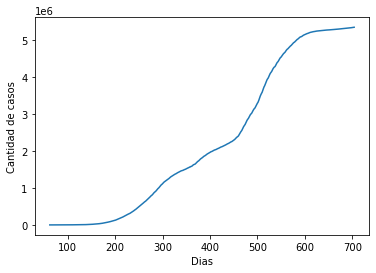

In [7]:
#seleccionamos Argentina

ind_arg=np.where(paises=='Argentina')
ind_arg=ind_arg[0]
casos_arg=confirmados[ind_arg]
dias=np.arange(0,len(casos_arg))
plt.plot(dias,casos_arg)
plt.xlabel('Dias')
plt.ylabel('Cantidad de casos')

Esta es la curva de **casos totales** de la Argentina. Aquí no se ven las olas, ya que estas se ven en la curva de casos confirmados por día, es decir, de casos nuevos. Esta habla de los acumulados, entonces siempre se agregan.

Para ver mejor la curva, podemos tomar el logartimo de los datos. Una curva exponencial se ve lineal en escala logarítmica


Text(0, 0.5, 'log cantidad de casos')

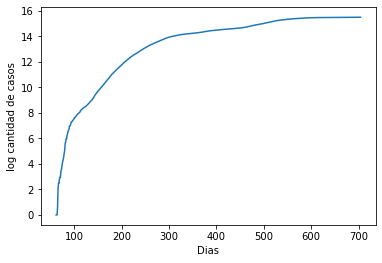

In [8]:
plt.plot(dias,np.log(casos_arg))
plt.xlabel('Dias')
plt.ylabel('log cantidad de casos')

Veamos lo que pasa entre los 2 y 3 meses desde que se detectó el primer caso en Argentina, para ver cómo fue el $k$ inicial

Text(0, 0.5, 'Cantidad de casos')

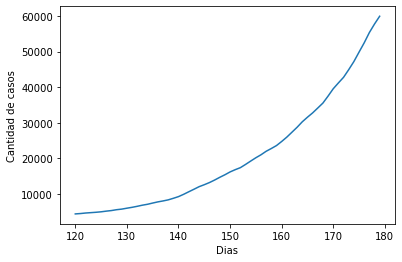

In [9]:
casos_principio=casos_arg[120:180]
dias_principio=dias[120:180]

plt.plot(dias_principio,casos_principio)
plt.xlabel('Dias')
plt.ylabel('Cantidad de casos')

Es difícil determinar si esta parte es exponencial. Analicemos qué pasa en escala logarítmica.

Text(0, 0.5, 'log cantidad de casos')

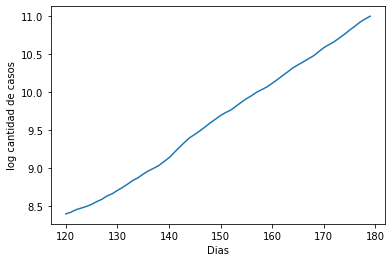

In [10]:
plt.plot(dias_principio,np.log(casos_principio))
plt.xlabel('Dias')
plt.ylabel('log cantidad de casos')

¡Se ve bastante lineal! Aprovechemos esto para averiguar el $k$ utilizando un ajuste hecho con el método de cuadrados mínimos, ajustando los datos al modelo 

$Confirmados=e^{k(t-t_0)}$



In [11]:
#definimos función para ajustar modelo
def exponencial(t,k,t0):
  C=np.exp(k*(t-t0))
  return C

In [12]:
#ajustamos
popt, pcov = curve_fit(exponencial, dias_principio, casos_principio)
popt

array([ 4.62592629e-02, -5.88352945e+01])

Veamos cómo se ajusta lo que obtuvimos a los datos reales

No handles with labels found to put in legend.


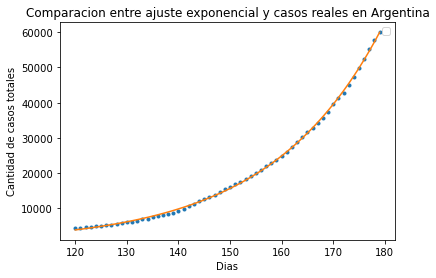

In [13]:
k=popt[0]
t0=popt[1]
casos_simu=exponencial(dias_principio,k,t0)
plt.plot(dias_principio,casos_principio,'.')
plt.plot(dias_principio,casos_simu)
plt.xlabel('Dias')
plt.ylabel('Cantidad de casos totales')
plt.title('Comparacion entre ajuste exponencial y casos reales en Argentina')  
plt.legend()
plt.show()

Hagamos una función que determine los casos nuevos por día a partir de estas curvas. Puede ser útil para tu análisis.

In [14]:
def casos_nuevos(casos):
  nuevos=np.zeros(len(casos))
  i=0
  while i<len(nuevos)-1:
    nuevos[i]=casos[i+1]-casos[i]
    i=i+1

  return nuevos   

No handles with labels found to put in legend.


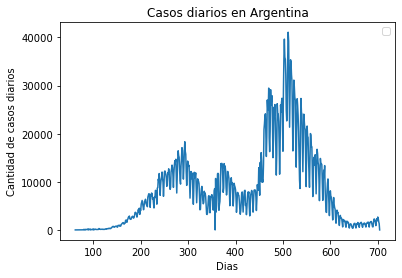

In [15]:
casos_arg=np.array(casos_arg)
nuevos_arg=casos_nuevos(casos_arg)
plt.plot(nuevos_arg)
plt.xlabel('Dias')
plt.ylabel('Cantidad de casos diarios')
plt.title('Casos diarios en Argentina')  
plt.legend()
plt.show()

## Obtención  de distintos valores de ajuste k

El valor de k es: 0.010804975046555036


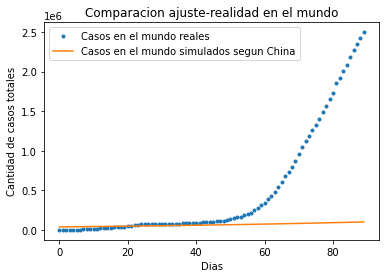

In [16]:
# Calculo de k para China

del df
df=data
mask = data.location=='China'
df = data[mask]

casos=np.array(df['total_cases'])
casos = casos[np.logical_not(np.isnan(casos))]

dias=np.arange(0,len(casos))

casos_principio=casos[0:90]
dias_principio=dias[0:90]

popt, pcov = curve_fit(exponencial, dias_principio, casos_principio, maxfev=4000)
k=popt[0]
t0=popt[1]

print("El valor de k es:",k)

# Graficamos para todo el mundo entre los 4 y 6 meses de comenzada la pandemia
mask = data.location=="World"
df_w = data[mask]
df_w.head(10)

casos_w=np.array(df_w['total_cases'])
casos_w = casos_w[np.logical_not(np.isnan(casos_w))]
dias_w=np.arange(0,len(casos))

casos_principio_w=casos_w[0:90]
dias_principio_w=dias_w[0:90]

casos_simu_w=exponencial(dias_principio_w,k,t0)
plt.plot(dias_principio_w,casos_principio_w,'.', label = 'Casos en el mundo reales')
plt.plot(dias_principio_w,casos_simu_w, label = 'Casos en el mundo simulados segun China')
plt.xlabel('Dias')
plt.ylabel('Cantidad de casos totales')
plt.title('Comparacion ajuste-realidad en el mundo') 
plt.legend()

*Conclusión N1:* Podemos observar una similitud en las curvas al principio (esto es esperable ya que en China es donde comenzó la pandemia) pero luego una gran divergencia de ambas curvas ya que China al muy poco tiempo dejo de ser el foco en la pandemia.

El valor de k es: 0.057443151017651975


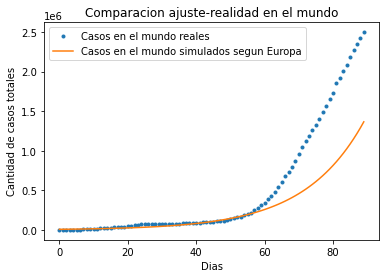

In [17]:
# Calculo de k Europa

del df
df=data
mask = data.location=='Europe'
df = data[mask]

casos=np.array(df['total_cases'])
casos = casos[np.logical_not(np.isnan(casos))]

dias=np.arange(0,len(casos))

casos_principio=casos[0:90]
dias_principio=dias[0:90]

popt, pcov = curve_fit(exponencial, dias_principio, casos_principio, maxfev=4000)
k=popt[0]
t0=popt[1]

print("El valor de k es:",k)

# Graficamos para todo el mundo entre los 4 y 6 meses de comenzada la pandemia
mask = data.location=="World"
df_w = data[mask]
df_w.head(10)

casos_w=np.array(df_w['total_cases'])
casos_w = casos_w[np.logical_not(np.isnan(casos_w))]
dias_w=np.arange(0,len(casos))

casos_principio_w=casos_w[0:90]
dias_principio_w=dias_w[0:90]

casos_simu_w=exponencial(dias_principio_w,k,t0)

plt.plot(dias_principio_w,casos_principio_w,'.', label = 'Casos en el mundo reales')
plt.plot(dias_principio_w,casos_simu_w, label = 'Casos en el mundo simulados segun Europa')
plt.xlabel('Dias')
plt.ylabel('Cantidad de casos totales')
plt.title('Comparacion ajuste-realidad en el mundo') 
plt.legend()

*Conclusión N2:* Siguiendo con la línea temporal de la pandemia, el foco se trasladó desde China a Europa (siendo Italia uno de los más afectados) por lo que vemos como la tendencia exponencial se corresponde a ambas curvas.

El valor medio de k es: 0.05231976304073574


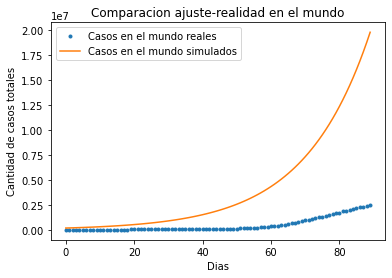

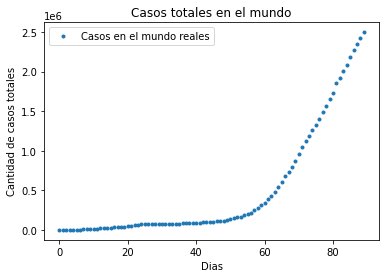

In [18]:
# Calculo de k para varios paises

lista_paises = ['China','Argentina','Italy','Spain','India','Brazil','United States','Nigeria']
k_l=[]
t0_l=[]

for pais in lista_paises:
   
    del df
    df=data
    mask = data.location==pais
    df = data[mask]

    casos=np.array(df['total_cases'])
    casos = casos[np.logical_not(np.isnan(casos))]

    dias=np.arange(0,len(casos))
    
    casos_principio=casos[0:90]
    dias_principio=dias[0:90]
    
    popt, pcov = curve_fit(exponencial, dias_principio, casos_principio, maxfev=4000)
    k_l.append(popt[0])
    t0_l.append(popt[1])

k=mean(k_l)
t0=mean(t0_l)
print("El valor medio de k es:",k)

# Graficamos para todo el mundo entre los 4 y 6 meses de comenzada la pandemia
mask = data.location=="World"
df_w = data[mask]
df_w.head(10)

casos_w=np.array(df_w['total_cases'])
casos_w = casos_w[np.logical_not(np.isnan(casos_w))]
dias_w=np.arange(0,len(casos))

casos_principio_w=casos_w[0:90]
dias_principio_w=dias_w[0:90]

casos_simu_w=exponencial(dias_principio_w,k,t0)
plt.plot(dias_principio_w,casos_principio_w,'.', label = 'Casos en el mundo reales')
plt.plot(dias_principio_w,casos_simu_w, label = 'Casos en el mundo simulados')
plt.xlabel('Dias')
plt.ylabel('Cantidad de casos totales')
plt.title('Comparacion ajuste-realidad en el mundo') 
plt.legend()
plt.show()

plt.plot(dias_principio_w,casos_principio_w,'.', label = 'Casos en el mundo reales')
plt.xlabel('Dias')
plt.ylabel('Cantidad de casos totales')
plt.title('Casos totales en el mundo')
plt.legend()

*Conclusión N3:* Tomando los países de todo el mundo donde es sabido que los casos crecieron ampliamente (no Argentina de todas formas) en los primeros meses, generamos una función predictora que a los 2 meses podemos ver la tendencia exponencial correspondiente al aumento abrupto de los casos en casi todo el mundo. Sin embargo, habiendo sido ajustada para los países donde más aumentaron los casos (Italia, España, EEUU y Brasil) sobrestima la cantidad real de casos en todo el mundo. 

La **selección de los países** está hecha en base a cuales fueron los países donde más se extendió el virus en los primeros meses. 

El valor medio de k es: 0.0560686291562466


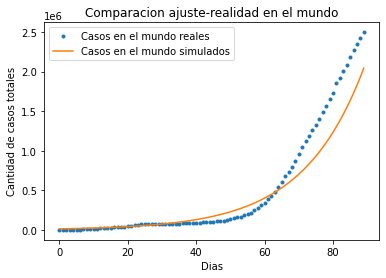

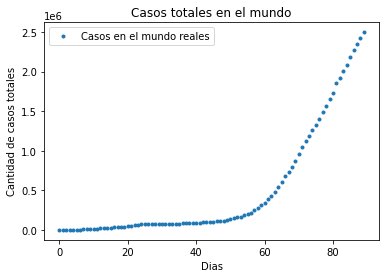

In [19]:
# Calculo de k para varios continentes

lista_paises = ['European Union','Asia','South America','North America']
k_l=[]
t0_l=[]

for pais in lista_paises:
   
    del df
    df=data
    mask = data.location==pais
    df = data[mask]

    casos=np.array(df['total_cases'])
    casos = casos[np.logical_not(np.isnan(casos))]

    dias=np.arange(0,len(casos))
    
    casos_principio=casos[0:90]
    dias_principio=dias[0:90]
    
    popt, pcov = curve_fit(exponencial, dias_principio, casos_principio, maxfev=4000)
    k_l.append(popt[0])
    t0_l.append(popt[1])

k=mean(k_l)
t0=mean(t0_l)
print("El valor medio de k es:",k)

# Graficamos para todo el mundo entre los 4 y 6 meses de comenzada la pandemia
mask = data.location=="World"
df_w = data[mask]
df_w.head(10)

casos_w=np.array(df_w['total_cases'])
casos_w = casos_w[np.logical_not(np.isnan(casos_w))]
dias_w=np.arange(0,len(casos))

casos_principio_w=casos_w[0:90]
dias_principio_w=dias_w[0:90]

casos_simu_w=exponencial(dias_principio_w,k,t0)
plt.plot(dias_principio_w,casos_principio_w,'.', label = 'Casos en el mundo reales')
plt.plot(dias_principio_w,casos_simu_w, label = 'Casos en el mundo simulados')
plt.xlabel('Dias')
plt.ylabel('Cantidad de casos totales')
plt.title('Comparacion ajuste-realidad en el mundo') 
plt.legend()
plt.show()

plt.plot(dias_principio_w,casos_principio_w,'.', label = 'Casos en el mundo reales')
plt.xlabel('Dias')
plt.ylabel('Cantidad de casos totales')
plt.title('Casos totales en el mundo')
plt.legend()

*Conclusión N4:* Tomando ya varios continentes que resultan en una aproximación más completa del mundo podemos. Sin embargo, en este caso se dé un sub-ajuste y se estiman menos casos de los que realmente hubo. Aun así, esta fue la mejor aproximación dado que es la que más países incorporo. 

## Intervalo de confianza de K
Asumimos un $\alpha$= 0.05 que implica que toleraremos hasta un 5% de error.
Una vez establecido alpha, podemos armar el intervalo de confianza para saber con un 95% un intervalo donde se encuentra el promedio $\mu$ de toda la población, usando una submuestra de esta. Para el caso de una gaussiana, se hace aplicando la fórmula.

$\mu_{poblacion}$ está en el intervalo $(\mu_{datos}-z_{\alpha} {{\sigma}\over{ \sqrt{n}}},\mu_{datos}+z_{\alpha} {{\sigma}\over{ \sqrt{n}}})$, donde $ n$ es el tamaño de la población y  $z_{\alpha}$ es el "valor crítico de la distribución" y depende únicamente del **tipo** de distribución que tenemos y de $\alpha$. Para distribuciones normales está tabulado, [acá](
https://www.superprof.es/diccionario/matematicas/estadistica/valores-criticos.html) tienen algunos ejemplos. En este caso si $\alpha=0.05$, corresponde $z_{aplha}=1.96$.

La media de la muestra es: 0.0560686291562466


El intervalo de confianza es: [0.04130622606943737, 0.07083103224305584]


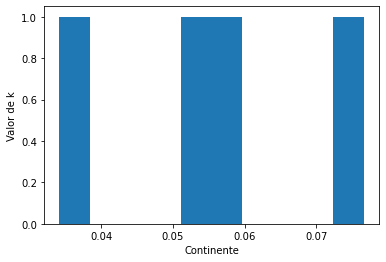

In [20]:
plt.hist(k_l)
plt.xlabel('Continente')
plt.ylabel('Valor de k')

mu_muestra=np.mean(k_l)
print("La media de la muestra es:",mu_muestra)
print("\n")
sigma_muestra=np.std(k_l)
z=1.96
n=len(k_l)
int_conf=[mu_muestra-z*sigma_muestra/np.sqrt(n),mu_muestra+z*sigma_muestra/np.sqrt(n)]
print("El intervalo de confianza es:",int_conf)

*Conclusión Final:* Podemos observar que tomando países seleccionados con criterio no conseguimos una buen aproximación. Sin embargo, al tomar por continentes si, dado que la muestra es mucho mayor y la curva se ajusta mejor a los datos

### Pregunta:

¿Existe una correlacion entre el IDH y la cantidad de muertes por millon de habitantes?

In [21]:
column_1 = data["human_development_index"]
column_2 = data["total_deaths_per_million"]
correlation = column_1.corr(column_2)
print(correlation)

0.3524494097979312


**Conclusión:** La correlación es muy baja entre el IDH y el total de muertes por millón de habitantes. Esto se debe a que las regiones con IDH más bajo (África subsahariana) no se vieron muy afectados por pandemia debido a su desconexión con el mundo, Europa y EEUU por otro lado sufrieron muchas muertes y Brazil siendo un pais con IDH relativamente bajo tambien.

# 02 - Evaluando estrategias

## Política  seleccionada e indicadores a estudiar

Estudiaremos el efecto del cierre de fronteras de mas de 365 días, tomando distintos países como ejemplo. Y estudiaremos como esto influyo en:
1. Las muertes totales por millón de habitantes
2. Los casos totales por millón de habitantes
3. La cantidad de pacientes totales hospitalizados

Estos indicadores son útiles para medir el efecto de esta política dado que a los 365 días aproximadamente comenzaron las campañas de vacunación y no es un límite exacto como lo puede ser una implementación de una cuarentena.

## Paises seleccionados para el estudio

1. Aplicaron cierre de fronteras completo de más de 365 días
    1. Argentina ([Fuente](https://www.argentina.gob.ar/noticias/reapertura-de-fronteras-argentina-recibe-mas-de-200-vuelos-con-turistas-internacionales-en))
    2. Australia ([Fuente](https://www.cnbc.com/2021/11/01/australia-reopens-its-borders-to-new-zealand-and-singapore.html))
    3. India ([Fuente](https://edition.cnn.com/travel/article/india-tourism-reopening-intl-hnk/index.html))
    4. Tailandia ([Fuente](https://www.bbc.com/news/business-59115395))
    5. Irán ([Fuente](https://timesofindia.indiatimes.com/travel/travel-news/iran-reopens-its-border-for-international-tourism-after-nearly-two-years/as87287327.cms))


2. No aplicaron cierre de fronteras completo de más de 365 días
    1. Brazil ([Fuente](https://www.reuters.com/article/health-coronavirus-brazil-travel-idUSL2N2F036J))
    2. Chile ([Fuente](https://chilereports.cl/en/news/2020/11/17/chile-opens-borders-to-foreigners-beginning-november-23))
    3. Mexico ([Fuente](https://www.washingtonpost.com/travel/tips/mexico-travel-border-covid/))
    4. Suecia ([Fuente](https://www.politico.eu/article/sweden-the-odd-one-out-as-nordics-finland-norway-denmark-turn-nationalist-coronavirus-covid/))
    5. Egipto ([Fuente](https://www.dw.com/en/egypt-tries-to-restart-tourism-during-coronavirus-pandemic/a-53876823))


## Medicion de los indicadores

In [22]:
del df
df = data.loc[(data['location'] == "Argentina" ) | (data['location'] == "Australia") | (data['location'] == "India") | (data['location'] == "Thailand") | (data['location'] == "Iran") | (data['location'] == "Brazil") | (data['location'] == "Chile") | (data['location'] == "Mexico") | (data['location'] == "Sweden") | (data['location'] == "Egypt")]
df = df[['location','total_cases', 'new_cases','total_cases_per_million', 'total_deaths','new_deaths','total_deaths_per_million','hosp_patients_per_million']].copy()
df.head(100)

,location,total_cases,new_cases,total_cases_per_million,total_deaths,new_deaths,total_deaths_per_million,hosp_patients_per_million
4817,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4818,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4819,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4820,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4821,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
4912,Argentina,1451.0,0.0,31.816,44.0,1.0,0.965,NaN
4913,Argentina,1554.0,103.0,34.075,48.0,4.0,1.052,NaN
4914,Argentina,1628.0,74.0,35.697,56.0,8.0,1.228,NaN
4915,Argentina,1715.0,87.0,37.605,63.0,7.0,1.381,NaN


In [23]:
# Medicion de las metricas
del lista_paises

lista_paises = ["Argentina","Australia","India","Thailand","Iran","Brazil","Chile","Mexico","Sweden","Egypt"]
cerro_fronteras = [1,1,1,1,1,0,0,0,0,0]
casos_millon= []
muertes_millon= []
hosp_millon= []

for pais in lista_paises:
   
    df_aux=df
    mask = df_aux.location==pais
    df_aux = df[mask]

    max_c = df_aux["total_cases_per_million"].max()
    max_d = df_aux["total_deaths_per_million"].max()
    max_h = df_aux["hosp_patients_per_million"].max()
    
    casos_millon.append(max_c)
    muertes_millon.append(max_d)
    hosp_millon.append(max_h)

    del df_aux

print(lista_paises)
print("\n")
print("La cantidad de casos por millon de habitantes por cada pais es: \n",casos_millon)
print("\n")
print("La cantidad de muertes por millon de habitantes por cada pais es: \n",muertes_millon)
print("\n")
print("La cantidad de hospitalizaciones por millon de habitantes por cada pais es: \n",hosp_millon)

['Argentina', 'Australia', 'India', 'Thailand', 'Iran', 'Brazil', 'Chile', 'Mexico', 'Sweden', 'Egypt']


La cantidad de casos por millon de habitantes por cada pais es: 
 [117105.134, 8496.943, 24861.014, 30667.836, 72145.766, 103475.559, 92260.754, 29949.305, 119303.743, 3483.29]


La cantidad de muertes por millon de habitantes por cada pais es: 
 [2557.7, 79.726, 339.841, 299.725, 1531.247, 2876.892, 2003.97, 2266.221, 1493.087, 198.804]


La cantidad de hospitalizaciones por millon de habitantes por cada pais es: 
 [nan, nan, nan, nan, nan, nan, nan, nan, 295.665, nan]


**Comentario:** El unico pais que provee los datos de hospitalizacion por millon de habitantes es Suecia. Por lo que no va a servir como dato predictor. 

## Modelos de regresion logistica

In [24]:
def sigmoidea(x,x0, k):
    y = 1 / (1 + np.exp(-k*(x-x0)))
    return (y)

<ipython-input-24-130839f5d03e>:2: RuntimeWarning: overflow encountered in exp
  y = 1 / (1 + np.exp(-k*(x-x0)))


Text(0, 0.5, 'Cerro las fronteras')

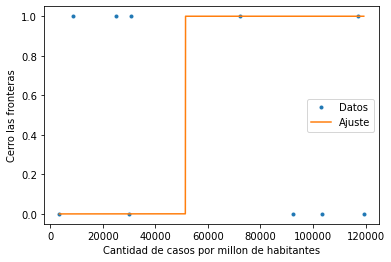

In [25]:
p0 = [np.median(casos_millon),1] # Punto de partida para los parámetros
popt, pcov = curve_fit(sigmoidea, casos_millon, cerro_fronteras,p0, method='dogbox') # Fiteo

x_plot=np.arange(min(casos_millon),max(casos_millon),0.1)
cierre_fronteras_ajuste_1=sigmoidea(x_plot,popt[0],popt[1])

plt.plot(casos_millon,cerro_fronteras,'.',label="Datos")
plt.plot(x_plot,cierre_fronteras_ajuste_1,label="Ajuste")
plt.legend()
plt.xlabel('Cantidad de casos por millon de habitantes')
plt.ylabel('Cerro las fronteras')

<ipython-input-24-130839f5d03e>:2: RuntimeWarning: overflow encountered in exp
  y = 1 / (1 + np.exp(-k*(x-x0)))


Text(0, 0.5, 'Cerro las fronteras')

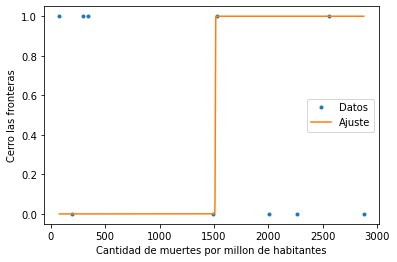

In [26]:
# Para muertes por millon de habitantes

p0 = [np.median(muertes_millon),1] # punto de partida para los parámetros
popt2, pcov = curve_fit(sigmoidea,muertes_millon, cerro_fronteras,p0, method='dogbox') # Fiteo

x_plot_2=np.arange(min(muertes_millon),max(muertes_millon),0.1)
cierre_fronteras_ajust_2=sigmoidea(x_plot_2,popt2[0],popt2[1]) # Usamos lo ajustado para predecir

plt.plot(muertes_millon,cerro_fronteras,'.',label="Datos")
plt.plot(x_plot_2,cierre_fronteras_ajust_2,label="Ajuste")
plt.legend()
plt.xlabel('Cantidad de muertes por millon de habitantes')
plt.ylabel('Cerro las fronteras')

## Probamos con otros países

1. Aplicaron cierre de fronteras completo de más de 365 días
    1. Uruguay ([Fuente](https://www.gub.uy/presidencia/comunicacion/noticias/uruguay-reabrio-sus-fronteras-turistas-todo-mundo)
    2. Nueva Zelanda ([Fuente](https://www.theguardian.com/world/2021/nov/24/new-zealand-to-reopen-borders-to-vaccinated-visitors-from-new-year))

2. No aplicaron cierre de fronteras completo de mas de 365 dias
    1. Colombia ([Fuente](https://www.infobae.com/america/colombia/2020/12/01/colombia-abre-nuevamente-sus-fronteras-maritimas-y-fluviales/))
    2. Sudáfrica ([Fuente](https://www.reuters.com/article/us-health-coronavirus-safrica-idUSKBN27R2WS))

['Uruguay', 'New Zealand', 'South Africa', 'Colombia']


<ipython-input-24-130839f5d03e>:2: RuntimeWarning: overflow encountered in exp
  y = 1 / (1 + np.exp(-k*(x-x0)))


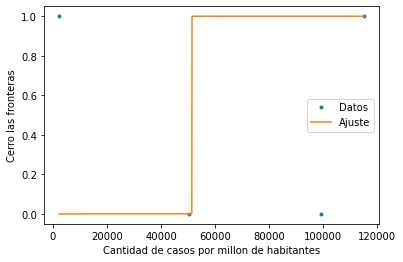

<ipython-input-24-130839f5d03e>:2: RuntimeWarning: overflow encountered in exp
  y = 1 / (1 + np.exp(-k*(x-x0)))


Text(0, 0.5, 'Cerro las fronteras')

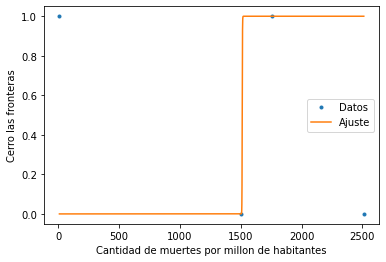

In [27]:
# Probamos estos clasificadores en otros paises nuevos

del df
df = data.loc[(data['location'] == "Uruguay" ) | (data['location'] == "New Zealand") | (data['location'] == "South Africa") | (data['location'] == "Colombia")]
df = df[['location','total_cases', 'new_cases','total_cases_per_million', 'total_deaths','new_deaths','total_deaths_per_million','hosp_patients_per_million']].copy()

del lista_paises

lista_paises = ["Uruguay","New Zealand","South Africa","Colombia"]
cerro_fronteras = [1,1,0,0]
casos_millon= []
muertes_millon= []
hosp_millon= []

for pais in lista_paises:
   
    df_aux=df
    mask = df_aux.location==pais
    df_aux = df[mask]

    max_c = df_aux["total_cases_per_million"].max()
    max_d = df_aux["total_deaths_per_million"].max()
    max_h = df_aux["hosp_patients_per_million"].max()
    
    casos_millon.append(max_c)
    muertes_millon.append(max_d)
    hosp_millon.append(max_h)

    del df_aux

print(lista_paises)

# Para casos por millon de habitantes usando los datos previamente fiteados

x_plot=np.arange(min(casos_millon),max(casos_millon),0.1)
cierre_fronteras_ajuste_1=sigmoidea(x_plot,popt[0],popt[1])

plt.plot(casos_millon,cerro_fronteras,'.',label="Datos")
plt.plot(x_plot,cierre_fronteras_ajuste_1,label="Ajuste")
plt.legend()
plt.xlabel('Cantidad de casos por millon de habitantes')
plt.ylabel('Cerro las fronteras')
plt.show()

# Para muertes por millon de habitantes usando los datos previamente fiteados

x_plot_2=np.arange(min(muertes_millon),max(muertes_millon),0.1)
cierre_fronteras_ajust_2=sigmoidea(x_plot_2,popt2[0],popt2[1]) # Usamos lo ajustado para predecir

plt.plot(muertes_millon,cerro_fronteras,'.',label="Datos")
plt.plot(x_plot_2,cierre_fronteras_ajust_2,label="Ajuste")
plt.legend()
plt.xlabel('Cantidad de muertes por millon de habitantes')
plt.ylabel('Cerro las fronteras')


## Conclusiones

Estos clasificadores no son de gran utilidad. El contexto pandémico es muy complejo, y políticas como el cierre de fronteras uno esperaría que resulten un una menor cantidad de casos o muertes totales a la larga, pero no es así. Cada país/estado/cultura responde a una política implementada por su gobierno de manera muy diferente y son muchos los factores que influyen a la hora de predecir si una política fue eficiente o no y normalmente, los casos y muertes totales por millón de un país son producto de las múltiples (o no) implementaciones de diferentes políticas y no de una sola. 

# 03 - Investigación

Durante la pandemia se habló mucho del impacto que tenía el virus SARS-CoV-2 en la gente que era fumadora ([Link](https://publications.jrc.ec.europa.eu/repository/handle/JRC121837)) y muchos investigadores están planteando una paradoja de los fumadores ya que parecieran estar protegidos y ser menos propensos a enfermarse que los fumadores.

¿Es posible buscar algún tipo de relación entre la cantidad de contagiados y la cantidad de fumadores de un país?

In [33]:
# Analicemos cuales son los paises con mas y con menos fumadores

del df
df = data[['location','total_cases','total_cases_per_million','female_smokers','male_smokers']].copy()
print(df.size)
df = df.dropna()
print(df.size)

690230
453705


**Comentario:** Hay muchos países sin información al respecto de cuantos fumadores poseen, pero aún asi sigue habiendo mucha información disponible.  

In [40]:
# Los 5 países con los hombres más fumadores
df = df.drop_duplicates(subset=['male_smokers'])

df.nlargest(5, ['male_smokers'])

,location,total_cases,total_cases_per_million,female_smokers,male_smokers
123471,Timor,1.0,0.744,6.3,78.1
57203,Indonesia,2.0,0.007,2.8,76.1
125713,Tunisia,1.0,0.084,1.1,65.8
65615,Kiribati,1.0,8.238,35.9,58.9
102314,Russia,2.0,0.014,23.4,58.3


In [41]:
# Los 5 países con las mujeres más fumadores

df.nlargest(5, ['female_smokers'])

,location,total_cases,total_cases_per_million,female_smokers,male_smokers
83508,Montenegro,2.0,3.184,44.0,47.9
108536,Serbia,1.0,0.146,37.7,40.2
65615,Kiribati,1.0,8.238,35.9,58.9
48174,Greece,1.0,0.096,35.3,52.0
29411,Croatia,1.0,0.245,34.3,39.9


In [42]:
# Los 5 países con los hombres menos fumadores

df.nsmallest(5, ['male_smokers'])

,location,total_cases,total_cases_per_million,female_smokers,male_smokers
47207,Ghana,3.0,0.095,0.3,7.7
39934,Ethiopia,1.0,0.008,0.4,8.5
96354,Panama,1.0,0.228,2.4,9.9
90635,Nigeria,1.0,0.005,0.6,10.8
38005,Eritrea,1.0,0.278,0.2,11.4


In [43]:
# Los 5 países con las mujeres menos fumadores

df.nsmallest(5, ['female_smokers'])

,location,total_cases,total_cases_per_million,female_smokers,male_smokers
90009,Niger,1.0,0.040,0.1,15.4
36086,Egypt,1.0,0.010,0.2,50.1
38005,Eritrea,1.0,0.278,0.2,11.4
8431,Azerbaijan,3.0,0.293,0.3,42.5
47207,Ghana,3.0,0.095,0.3,7.7


**Conclusión:** Podemos observar que los países con más fumadores hombres son países del sudeste asiático y los menos son africanos. Con respecto a las mujeres, los Balcanes tienen muchas fumadoras y países africanos son los que menos mujeres fumadoras tienen. 
Por otro lado, dado que este tipo de efecto se estudia caso a caso, es difícil inferir una conclusión de una población tan grande como son los casos diarios. Se deberían comparar muestras iguales de fumadores y no fumadores expuestos al virus e inferir de esos resultados
